# 递归函数
#### 在函数内部，可以调用其他函数。如果一个函数在内部调用自身本身，这个函数就是递归函数。

#### 举个例子，我们来计算阶乘n! = 1 x 2 x 3 x ... x n，用函数fact(n)表示，可以看出：

#### fact(n) = n! = 1 x 2 x 3 x ... x (n-1) x n = (n-1)! x n = fact(n-1) x n

#### 所以，fact(n)可以表示为n x fact(n-1)，只有n=1时需要特殊处理。

#### 于是，fact(n)用递归的方式写出来就是：

In [1]:
def fact(n):
    if n==1:
        return 1
    return n * fact(n - 1)

In [3]:
fact(5)

120

#### 如果我们计算fact(5)，可以根据函数定义看到计算过程如下：

#### ===> fact(5)
#### ===> 5 * fact(4)
#### ===> 5 * (4 * fact(3))
#### ===> 5 * (4 * (3 * fact(2)))
#### ===> 5 * (4 * (3 * (2 * fact(1))))
#### ===> 5 * (4 * (3 * (2 * 1)))
#### ===> 5 * (4 * (3 * 2))
#### ===> 5 * (4 * 6)
#### ===> 5 * 24
#### ===> 120
#### 递归函数的优点是定义简单，逻辑清晰。理论上，所有的递归函数都可以写成循环的方式，但循环的逻辑不如递归清晰。

#### 使用递归函数需要注意防止栈溢出。在计算机中，函数调用是通过栈（stack）这种数据结构实现的，每当进入一个函数调用，栈就会加一层栈帧，每当函数返回，栈就会减一层栈帧。由于栈的大小不是无限的，所以，递归调用的次数过多，会导致栈溢出。可以试试fact(1000)：

In [4]:
fact(1000)

4023872600770937735437024339230039857193748642107146325437999104299385123986290205920442084869694048004799886101971960586316668729948085589013238296699445909974245040870737599188236277271887325197795059509952761208749754624970436014182780946464962910563938874378864873371191810458257836478499770124766328898359557354325131853239584630755574091142624174743493475534286465766116677973966688202912073791438537195882498081268678383745597317461360853795345242215865932019280908782973084313928444032812315586110369768013573042161687476096758713483120254785893207671691324484262361314125087802080002616831510273418279777047846358681701643650241536913982812648102130927612448963599287051149649754199093422215668325720808213331861168115536158365469840467089756029009505376164758477284218896796462449451607653534081989013854424879849599533191017233555566021394503997362807501378376153071277619268490343526252000158885351473316117021039681759215109077880193931781141945452572238655414610628921879602238389714760

#### 解决递归调用栈溢出的方法是通过尾递归优化，事实上尾递归和循环的效果是一样的，所以，把循环看成是一种特殊的尾递归函数也是可以的。

#### 尾递归是指，在函数返回的时候，调用自身本身，并且，return语句不能包含表达式。这样，编译器或者解释器就可以把尾递归做优化，使递归本身无论调用多少次，都只占用一个栈帧，不会出现栈溢出的情况。

#### 上面的fact(n)函数由于return n * fact(n - 1)引入了乘法表达式，所以就不是尾递归了。要改成尾递归方式，需要多一点代码，主要是要把每一步的乘积传入到递归函数中：

In [5]:
def fact(n):
    return fact_iter(n, 1)

def fact_iter(num, product):
    if num == 1:
        return product
    return fact_iter(num - 1, num * product)

#### 可以看到，return fact_iter(num - 1, num * product)仅返回递归函数本身，num - 1和num * product在函数调用前就会被计算，不影响函数调用。

#### fact(5)对应的fact_iter(5, 1)的调用如下：

#### ===> fact_iter(5, 1)
#### ===> fact_iter(4, 5)
#### ===> fact_iter(3, 20)
#### ===> fact_iter(2, 60)
#### ===> fact_iter(1, 120)
#### ===> 120
#### 尾递归调用时，如果做了优化，栈不会增长，因此，无论多少次调用也不会导致栈溢出。

#### 遗憾的是，大多数编程语言没有针对尾递归做优化，Python解释器也没有做优化，所以，即使把上面的fact(n)函数改成尾递归方式，也会导致栈溢出。

In [6]:
fact(5)

120

# 小结
#### 使用递归函数的优点是逻辑简单清晰，缺点是过深的调用会导致栈溢出。

#### 针对尾递归优化的语言可以通过尾递归防止栈溢出。尾递归事实上和循环是等价的，没有循环语句的编程语言只能通过尾递归实现循环。

#### Python标准的解释器没有针对尾递归做优化，任何递归函数都存在栈溢出的问题。

# 练习
#### 汉诺塔的移动可以用递归函数非常简单地实现。

#### 请编写move(n, a, b, c)函数，它接收参数n，表示3个柱子A、B、C中第1个柱子A的盘子数量，然后打印出把所有盘子从A借助B移动到C的方法

如下图所示，从左到右有A、B、C三根柱子，其中A柱子上面有从小叠到大的n个圆盘，现要求将A柱子上的圆盘移到C柱子上去，期间只有一个原则：一次只能移到一个盘子且大盘子不能在小盘子上面，求移动的步骤和移动的次数

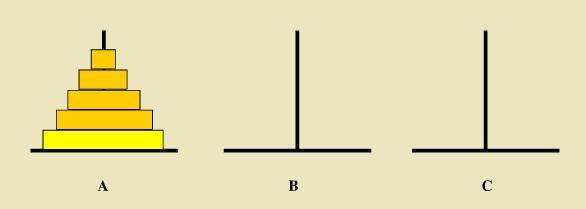


#### n=1
#### 第一次：1号盘：A->C         sum=1次

#### n=2
#### 第一次：1号盘：A->B
#### 第二次：2号盘：A->C
#### 第三次：1号盘：B->C         sum=3次

#### n=3
#### 第一次：1号盘：A->C
#### 第二次：2号盘：A->B
#### 第三次：1号盘：C->B
#### 第四次：3号盘：A->C
#### 第五次：1号盘：B->A
#### 第六次：2号盘：B->C
#### 第七次：1号盘：A->C         sum=7次

#### 移动次数为：2^n - 1

算法分析（递归算法）：

       我们在利用计算机求汉诺塔问题时，必不可少的一步是对整个实现求解进行算法分析。到目前为止，求解汉诺塔问题最简单的算法还是同过递归来求，至于是什么是递归，递归实现的机制是什么，我们说的简单点就是自己是一个方法或者说是函数，但是在自己这个函数里有调用自己这个函数的语句，而这个调用怎么才能调用结束呢？，这里还必须有一个结束点，或者具体的说是在调用到某一次后函数能返回一个确定的值，接着倒数第二个就能返回一个确定的值，一直到第一次调用的这个函数能返回一个确定的值。

       实现这个算法可以简单分为三个步骤：

　　　　（1）     把n-1个盘子由A 移到 B；

　　　　（2）     把第n个盘子由 A移到 C；

　　　　（3）     把n-1个盘子由B 移到 C；

从这里入手，在加上上面数学问题解法的分析，我们不难发现，移到的步数必定为奇数步：

　　　　（1）中间的一步是把最大的一个盘子由A移到C上去；

　　　　（2）中间一步之上可以看成把A上n-1个盘子通过借助辅助塔（C塔）移到了B上，

　　　　（3）中间一步之下可以看成把B上n-1个盘子通过借助辅助塔（A塔）移到了C上；

In [2]:
def move(n, a, buffer, c):
    if(n == 1):
        print(a,"->",c)
        return
    move(n-1, a, c, buffer)
    move(1, a, buffer, c)
    move(n-1, buffer, a, c)